In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import geopandas as gpd
from itertools import product
import numpy as np

import sys
sys.path.insert(0, '../99_utils')
import utils
import objects

# Grid (climate) data

In [3]:
file = f'../{objects.DATA_RAW}/{objects.ERA5_RAW}'

In [4]:
ds = xr.open_dataset(file, engine='cfgrib')

In [5]:
ds

<xarray.Dataset> Size: 33MB
Dimensions:     (time: 2192, latitude: 74, longitude: 51)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 18kB 2022-01-01 ... 2024-12-31T12:00:00
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 592B -0.1 -0.35 -0.6 ... -17.85 -18.1 -18.35
  * longitude   (longitude) float64 408B -81.33 -81.08 -80.83 ... -69.08 -68.83
    valid_time  (time) datetime64[ns] 18kB ...
Data variables:
    t2m         (time, latitude, longitude) float32 33MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-03T01:25 GRIB to CDM+CF via cfgrib-0.9.1...

# Geojson (district) data

In [6]:
file = f'../{objects.DATA_PROCESSED}/{objects.DISTRICTS_CLEAN}'

In [7]:
gdf = gpd.read_file(file)

<Axes: >

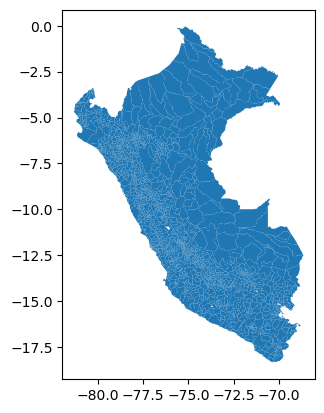

In [8]:
gdf.plot()

In [9]:
gdf['centroid'] = gdf['geometry'].centroid

/tmp/ipykernel_47816/1614308611.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


In [10]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
gdf.columns

Index(['ubigeo', 'dpto', 'prov', 'dist', 'geometry', 'centroid'], dtype='object')

# Geospatial processing

In [12]:
# dict of districts with centroids
centroids = {row['ubigeo']: (row['centroid'].x, row['centroid'].y) for _, row in gdf.iterrows()}

In [16]:
len(centroids)

1873

In [13]:
n = 1
x = {k: v for k, v in list(centroids.items())[:n]}

In [14]:
x

{'030101': (-72.87161162334024, -13.635841513021804)}

In [15]:
utils.days_extreme_weather(x, 4, ds, 1, 2022, 2024, '../../data_processed/intermediate/extreme-weather-days/')

True